<a href="https://colab.research.google.com/github/TonnBH/APPML_Projects/blob/main/Modelo_Preditivo_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
affairs = pd.read_csv ("/content/drive/MyDrive/ML_Projects/Project_01/affairs.csv")
affairs.head(100)

In [ ]:
affairs.shape

(6366, 10)

In [ ]:
affairs = affairs.drop(['Unnamed: 0'], axis = 1)

In [ ]:
def wholeNumber (x):
  return int(x + 0.5)

affairs['affairs'] = affairs['affairs'].map(wholeNumber)

In [ ]:
affairs.head(100)

<Axes: >

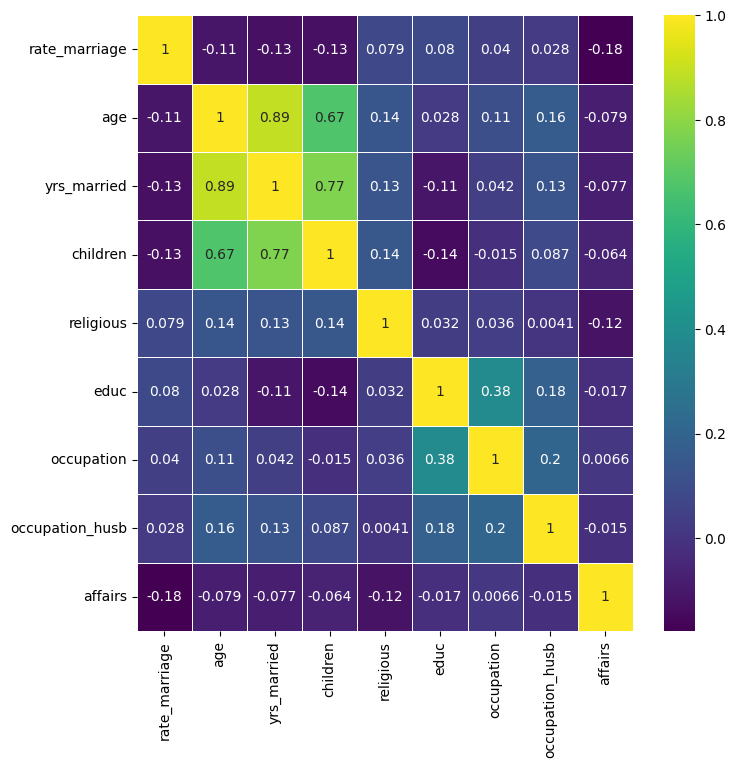

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(affairs.corr(), annot=True, cmap='viridis', linewidths=.5)

In [ ]:
affairs.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.697769
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.218132
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,58.000000


<ipython-input-32-e53fcef59dd7>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(affairs['educ'], affairs['affairs'], cmap='viridis')


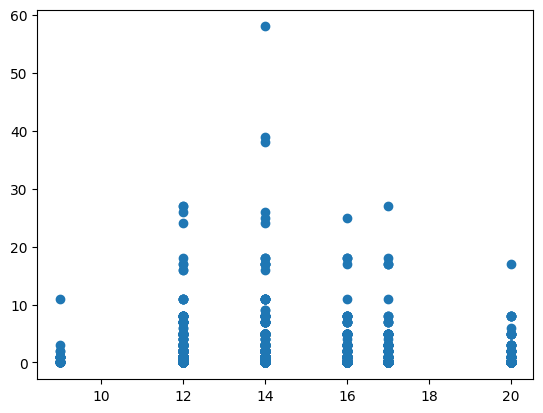

In [ ]:
plt.scatter(affairs['religious'], affairs['affairs'], cmap='viridis')

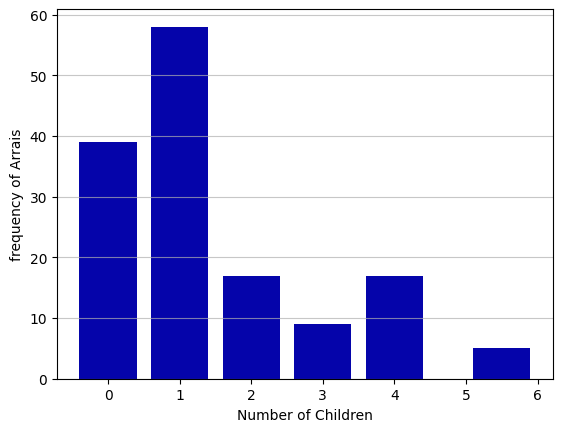

In [ ]:
plt.bar(affairs['children'], affairs['affairs'], color='#0504aa')
plt.grid(axis='y', alpha=0.7)
plt.xlabel('Number of Children')
plt.ylabel('frequency of Arrais')
plt.show()

<Axes: >

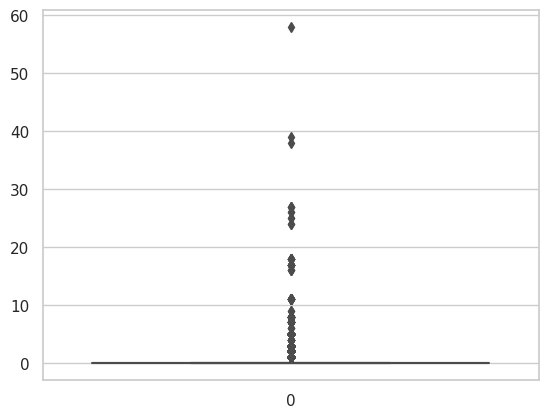

In [ ]:
sns.set_theme(style="whitegrid")
sns.boxplot(affairs['affairs'])

In [ ]:
 affairs_zero = affairs[affairs['affairs'] == 0]
 affairs = affairs[affairs['affairs'] > 0]

In [ ]:
affairs_zero.shape

(0, 9)

In [ ]:
affairs = affairs.append(affairs_zero.iloc[:500])

affairs.reset_index(inplace = True, drop = True)
affairs.tail(3)

<ipython-input-69-361dafa6f25f>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  affairs = affairs.append(affairs_zero.iloc[:500])


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
1575,3.0,37.0,23.0,2.0,2.0,12.0,5.0,4.0,1
1576,2.0,22.0,2.5,2.0,2.0,12.0,2.0,2.0,5
1577,4.0,32.0,13.0,0.0,3.0,14.0,3.0,5.0,2


In [ ]:
affairs.shape

(1578, 9)

In [ ]:
affairs['children'].value_counts()

2.0    451
0.0    424
1.0    342
3.0    219
4.0     87
5.5     55
Name: children, dtype: int64

In [ ]:
affairs['educ'].value_counts()

14.0    626
12.0    549
16.0    214
17.0    107
20.0     68
9.0      14
Name: educ, dtype: int64

In [ ]:
affairs['rate_marriage'].value_counts()

4.0    555
3.0    440
5.0    348
2.0    175
1.0     60
Name: rate_marriage, dtype: int64

In [ ]:
affairs['religious'].value_counts()

2.0    623
3.0    544
1.0    334
4.0     77
Name: religious, dtype: int64

In [ ]:
affairs['occupation'].value_counts()

3.0    762
4.0    359
5.0    238
2.0    180
6.0     34
1.0      5
Name: occupation, dtype: int64

In [ ]:
affairs['occupation_husb'].value_counts()

4.0    501
5.0    439
2.0    344
6.0    132
3.0    127
1.0     35
Name: occupation_husb, dtype: int64

In [ ]:
plat_new = pd.get_dummies(affairs['rate_marriage'], prefix='rate')
dev_new = pd.get_dummies(affairs['religious'], prefix='religion')
rat_new = pd.get_dummies(affairs['occupation'], prefix='occ')
rat_new = pd.get_dummies(affairs['occupation_husb'], prefix='husb_occ')
y = affairs['affairs']

In [ ]:
affairs = pd.concat([affairs, plat_new, dev_new, rat_new], axis = 1)
x = affairs.drop(['affairs', 'rate_marriage', 'religious', 'occupation_husb'], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

In [ ]:
x.shape

(1578, 20)

In [ ]:
x.head()

,age,yrs_married,children,educ,occupation,rate_1.0,rate_2.0,rate_3.0,rate_4.0,rate_5.0,religion_1.0,religion_2.0,religion_3.0,religion_4.0,husb_occ_1.0,husb_occ_2.0,husb_occ_3.0,husb_occ_4.0,husb_occ_5.0,husb_occ_6.0
0,27.0,13.0,3.0,14.0,3.0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
1,22.0,2.5,0.0,16.0,3.0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
2,37.0,16.5,4.0,16.0,5.0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
3,27.0,9.0,1.0,14.0,3.0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0
4,27.0,9.0,0.0,14.0,3.0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
pca = PCA(n_components= 15)
pca_fit = pca.fit_transform(x)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(pca_fit, y, test_size= 0.2, random_state= 1)

In [ ]:
random_model = RandomForestRegressor(n_estimators= 300, random_state= 0, n_jobs= - 1)

In [ ]:
random_model.fit(xtrain, ytrain)

y_pred = random_model.predict(xtest)

random_model_accuracy = round(random_model.score(xtrain, ytrain) * 100,2)
print(round(random_model_accuracy, 2), '%')

85.6 %


In [ ]:
import pickle

In [ ]:
saved_model = pickle.dump(random_model, open('/content/drive/MyDrive/ML_Projects/Project_01/affairs.pickle', 'wb'))
saved_pca = pickle.dump(pca, open('/content/drive/MyDrive/ML_Projects/Project_01/affairsPCA.pickle', 'wb'))